In [3]:
import pandas as pd 
import functions as f


import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("./data/train.csv")
stores = pd.read_csv("./data/store.csv")


data.Date = pd.to_datetime(data.Date)
data.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,a,1.0
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,0.0,a,1.0
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,0.0,a,1.0
3,2013-01-01,377.0,2.0,0.0,0.0,0.0,0.0,a,1.0
4,2013-01-01,376.0,2.0,0.0,0.0,0.0,0.0,a,1.0


In [3]:
data.shape

(637774, 9)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,618473.0,558.105623,321.885545,1.0,279.0,558.0,837.0,1115.0
DayOfWeek,618757.0,3.994914,1.997485,1.0,2.0,4.0,6.0,7.0
Sales,618747.0,5668.015834,3809.655137,0.0,3640.0,5625.0,7714.0,38037.0
Customers,618683.0,628.909831,463.786905,0.0,397.0,604.0,833.0,7388.0
Open,618588.0,0.829167,0.376363,0.0,1.0,1.0,1.0,1.0
Promo,618580.0,0.370447,0.482925,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,618437.0,0.173253,0.378466,0.0,0.0,0.0,0.0,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637774 entries, 0 to 637773
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           637774 non-null  datetime64[ns]
 1   Store          618473 non-null  float64       
 2   DayOfWeek      618757 non-null  float64       
 3   Sales          618747 non-null  float64       
 4   Customers      618683 non-null  float64       
 5   Open           618588 non-null  float64       
 6   Promo          618580 non-null  float64       
 7   StateHoliday   618520 non-null  object        
 8   SchoolHoliday  618437 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 43.8+ MB


In [6]:
data.isnull().sum()/len(data)

Date             0.000000
Store            0.030263
DayOfWeek        0.029818
Sales            0.029833
Customers        0.029934
Open             0.030083
Promo            0.030095
StateHoliday     0.030189
SchoolHoliday    0.030320
dtype: float64

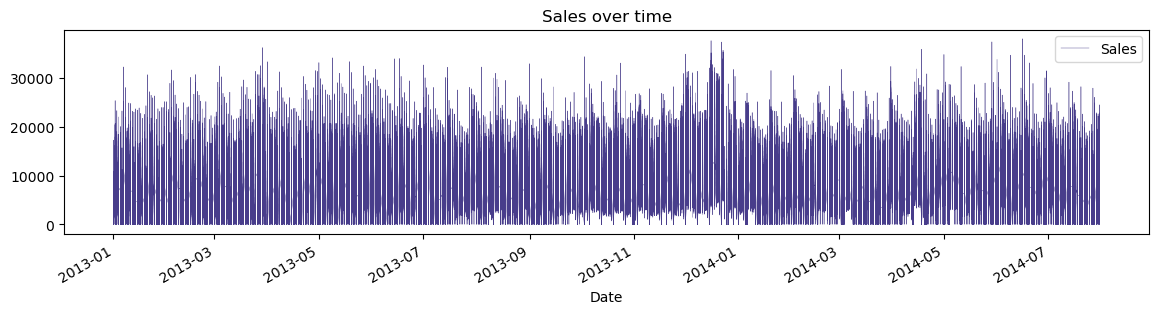

In [7]:
data.plot('Date', 'Sales',  color='darkslateblue', figsize=(14, 3), title='Sales over time', linewidth=0.3);

In [8]:
df_resample = data.set_index('Date')
df_M = df_resample.resample('M').mean()

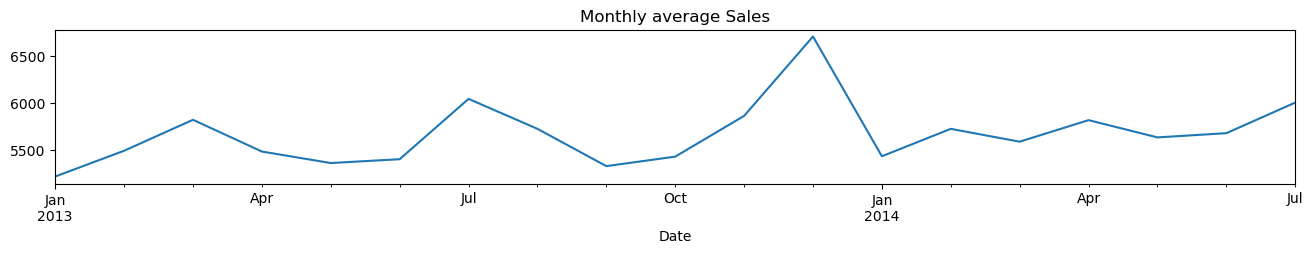

In [9]:
df_M.Sales.plot(figsize=(16,2), title='Monthly average Sales');

In [5]:
df = f.join_with_store(data)

<AxesSubplot:>

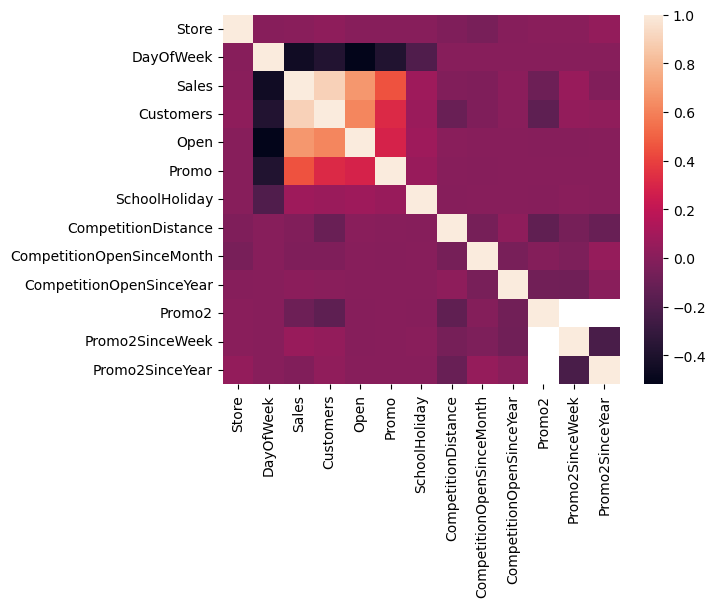

In [18]:
import seaborn as sns
sns.heatmap(df.corr())

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def visualize_features(data, target_column):
    numerical_features = data.select_dtypes(include=[np.number]).columns
    categorical_features = data.select_dtypes(include=[np.object]).columns

    n_rows = ((len(numerical_features) + len(categorical_features)) // 3) + 1
    n_columns = 3

    fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 5 * n_rows))

    # Flatten axes if necessary
    if n_rows > 1:
        axes = axes.flatten()

    for idx, feature in enumerate(numerical_features):
        if feature == target_column:
            continue
        sns.scatterplot(x=feature, y=target_column, data=data, ax=axes[idx])
        axes[idx].set_title(f"{feature} vs. {target_column}")

    for idx, feature in enumerate(categorical_features, len(numerical_features)):
        if feature == target_column:
            continue
        sns.boxplot(x=feature, y=target_column, data=data, ax=axes[idx])
        axes[idx].set_title(f"{feature} vs. {target_column}")

    # Remove any empty subplots
    for i in range(len(numerical_features) + len(categorical_features), n_rows * n_columns):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

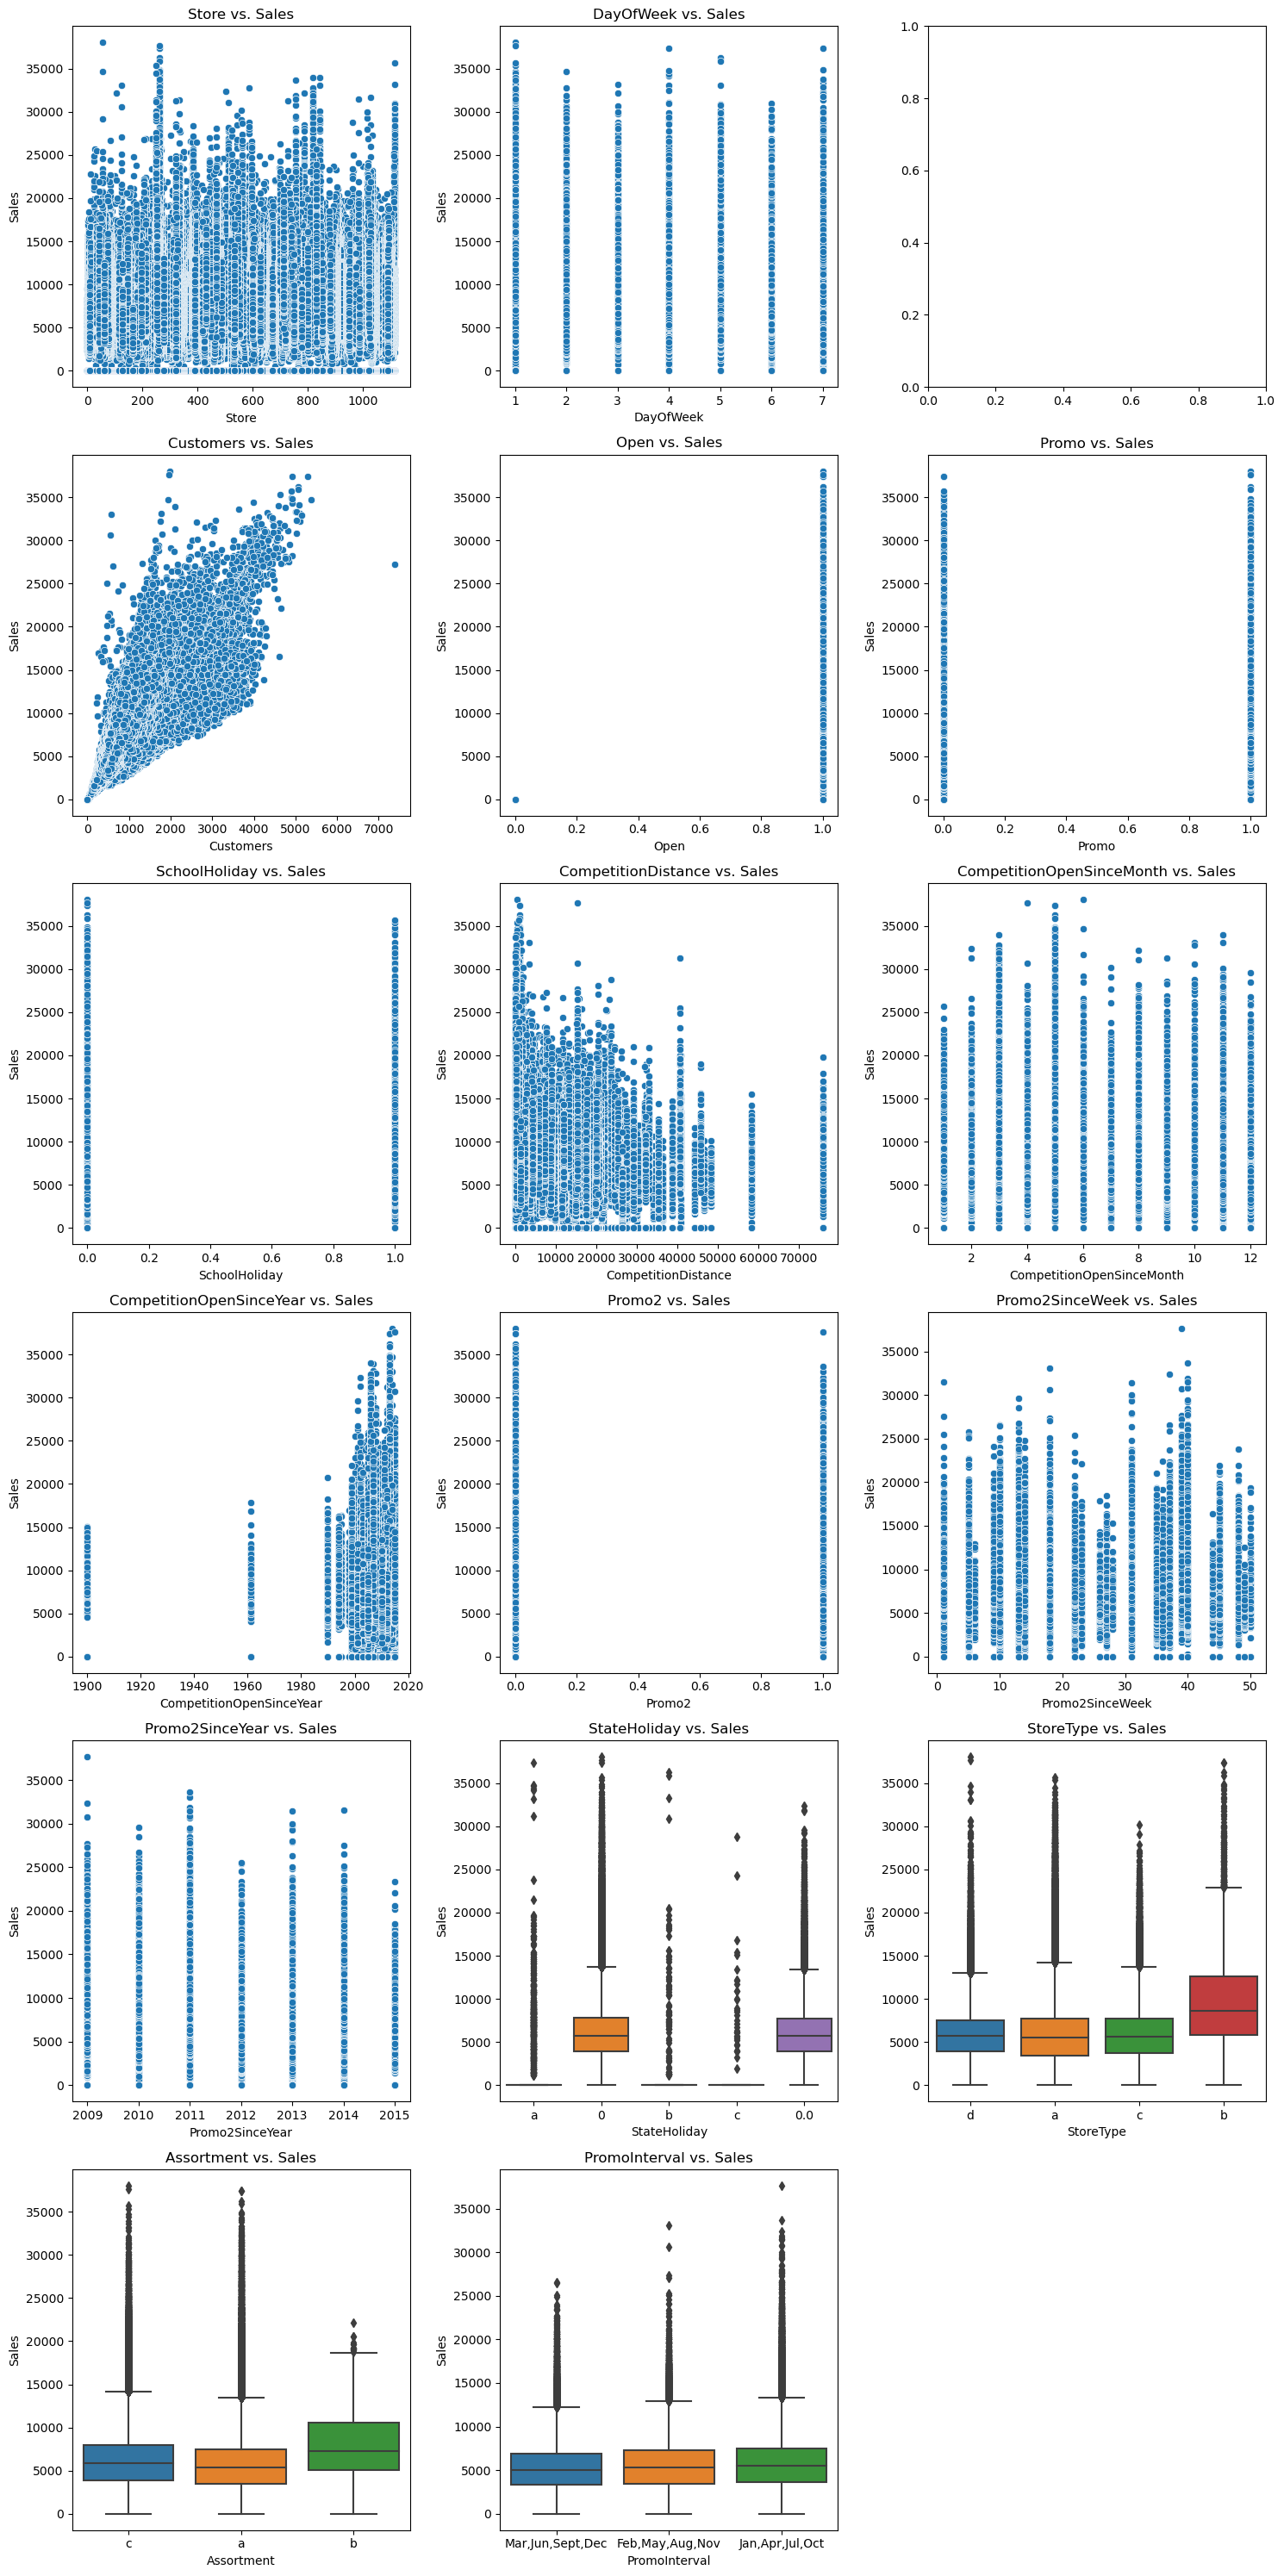

In [29]:
target_column = "Sales"
visualize_features(df, target_column)